In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from datetime import datetime
import shap

In [24]:
exec(open("../../header.py").read())

# Import data

In [40]:
X = pd.read_csv(processed_root('cervical_cancer_risks/X.csv'))
y = pd.read_csv(processed_root('cervical_cancer_risks/y.csv'))

In [44]:
X = (X - np.mean(X, axis = 0))/np.std(X, axis = 0)
X = X.dropna(axis = 1)

# Fit model

In [58]:
model = LogisticRegression()
model.fit(X, y['Biopsy'])

LogisticRegression()

# Comparison

In [59]:
exec(open("../../header.py").read())

In [60]:
shapley = SHAP_FI("linear")
native = Native_FI()
ice = ICE("binary")
pfi = PFI_FI(y['Biopsy'])

fi_metrics = [ice, native, shapley, pfi]

In [61]:
comparator = Comparator(trace = True)

In [62]:
comparator.fit(X, model, fi_metrics)

Fitting for <__main__.ICE object at 0x000001486C5EFB50>
Fitting for <__main__.Native_FI object at 0x000001486C5EFC40>
Fitting for <__main__.SHAP_FI object at 0x000001486C5EF5B0>
Fitting for <__main__.PFI_FI object at 0x000001486C5EF4F0>
PFI fits in 0.67 seconds


# Results

In [33]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [72]:
sigmoid(-0.064307)

0.48392878801275907

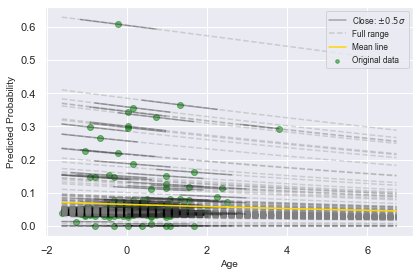

In [63]:
ice.ice_plot_single_feature('Age')

In [79]:
a = comparator.build_raw_table()\
    .assign(ice_sign = lambda x:x['ICE FI'] * np.sign(x['Native Feature Importance']))\
    .loc[:,'ice_sign']\
    .pipe(np.array)

a

array([-0.00327073, -0.00337278,  0.00127223,  0.00636665,  0.00324167,
        0.0248053 , -0.00990124, -0.00746458,  0.0179048 ,  0.00396942,
       -0.00045336, -0.00226289,  0.00035182,  0.01094075, -0.01385659,
        0.01246342, -0.02511047, -0.00522273,  0.02004571, -0.00563968,
        0.02724141, -0.00640101, -0.01195938, -0.00566331, -0.02029329,
        0.03596251,  0.03707822,  0.05581427,  0.02050657, -0.00743391])

In [83]:
y_pred = X.apply(lambda x:np.sum(x*a), axis = 1)

In [85]:
np.corrcoef(y_pred, model.predict_proba(X)[:,1])

array([[1.        , 0.81869183],
       [0.81869183, 1.        ]])

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, model.predict_proba(X)[:,1])

np.corrcoef(lr.predict(X), model.predict_proba(X)[:,1])

array([[1.        , 0.95946352],
       [0.95946352, 1.        ]])

In [64]:
comparator.build_raw_table()

,Feature,ICE FI,ICE In-Dist FI,Native Feature Importance,Shapley Value,PFI
0,Age,0.003271,0.003346,-0.064307,0.002419,0.000000
1,Number of sexual partners,0.003373,0.003663,-0.072247,-0.005778,0.000117
2,First sexual intercourse,0.001272,0.001266,0.023602,0.000214,0.000000
3,Num of pregnancies,0.006367,0.005944,0.104756,0.007418,0.000117
4,Smokes,0.003242,0.003208,0.060544,-0.009417,0.000000
5,Smokes (years),0.024805,0.019212,0.264896,-0.031241,0.001981
6,Smokes (packs/year),0.009901,0.010782,-0.226055,0.015148,0.002331
7,Hormonal Contraceptives,0.007465,0.007449,-0.135140,-0.045215,0.000699
8,Hormonal Contraceptives (years),0.017905,0.015372,0.259179,0.037724,0.000233
9,IUD,0.003969,0.003891,0.073553,-0.002025,0.000000


In [65]:
# comparator.build_normalized_table()
comparator.build_normalized_table().sort_values('Native Feature Importance', ascending = False).reset_index(drop = True)
comparator.build_normalized_table().sort_values('ICE FI', ascending = False).reset_index(drop = True)

,Feature,ICE FI,ICE In-Dist FI,Native Feature Importance,Shapley Value,PFI
0,Dx:CIN,13.738196,13.973817,5.854410,6.114714,17.857143
1,Dx:Cancer,9.126482,9.283008,5.147272,6.930219,5.252101
2,STDs: Time since last diagnosis,8.851858,5.776850,5.574858,5.063446,12.815126
3,STDs:HIV,6.705236,5.063276,5.774066,5.006488,8.613445
4,STDs:syphilis,6.180724,7.901715,10.309631,12.986468,0.000000
5,Smokes (years),6.105609,4.810033,4.293718,5.136909,3.571429
6,Dx:HPV,5.047513,5.134082,3.563063,4.797261,2.941176
7,STDs: Time since first diagnosis,4.995016,6.530600,7.485624,7.660403,13.865546
8,STDs:genital herpes,4.934078,3.613038,4.391082,1.612565,4.201681
9,Hormonal Contraceptives (years),4.407111,3.848695,4.201039,6.202919,0.420168


# Correlations

In [66]:
import seaborn as sn

In [67]:
?sn.heatmap

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'ICE FI'),
  Text(1.5, 0, 'ICE In-Dist FI'),
  Text(2.5, 0, 'Native Feature Importance'),
  Text(3.5, 0, 'Shapley Value'),
  Text(4.5, 0, 'PFI')])

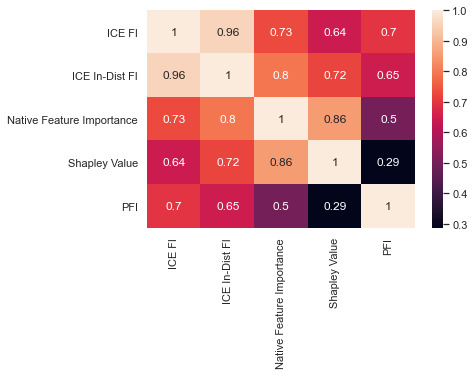

In [70]:
norm_vals = comparator\
    .build_normalized_table()\
    .iloc[:,1:]\

corr_matrix = norm_vals\
    .pipe(np.corrcoef, rowvar = False)

sn.heatmap(corr_matrix, 
           annot = True,
           yticklabels = norm_vals.columns,
           xticklabels = norm_vals.columns)

plt.xticks(rotation=90)

# To show

In [ ]:
def head_and_tail(df, k):
    return df.head(k).append(df.tail(k))

In [ ]:
results = comparator\
    .build_normalized_table()\
    .loc[:,['Feature', 'ICE FI', 'Native Feature Importance']]\
    .assign(Difference = lambda x:x['ICE FI'] - x['Native Feature Importance'])\
    .sort_values('Difference', ascending = False)\
    .pipe(head_and_tail, k = 3)\
    .reset_index(drop = True)\
    .round(1)

In [ ]:
caption = 'Feature impact table for features in cervical cancer dataset with two largest and most negative difference between Random Forest feature importance and ICE Feature Impact.'
label = 'tab:top2_cancer_table'

print(results.to_latex(index = False,
                      caption = caption,
                      label = label))

In [ ]:
ice.ice_plot_single_feature('Age', mode = 'c-ice')

In [ ]:
ice.ice_plot_single_feature('STDs:Hepatitis B', mode = 'c-ice')